In [1]:
import os
import pandas as pd

ROOT_PATH = '/sources/dataset/'
df = pd.read_csv(os.path.join(ROOT_PATH, 'train.csv'))
landmarks = os.listdir(os.path.join(ROOT_PATH, 'train_landmark_files'))

In [2]:
df.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [4]:
paths = df.path.values
p_ids = df.participant_id.values
s_ids = df.sequence_id.values
labels = df.sign.values

In [5]:
sample = pd.read_parquet(os.path.join(ROOT_PATH, paths[0]))
sample

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
12484,42,42-right_hand-16,right_hand,16,0.001660,0.549574,-0.145409
12485,42,42-right_hand-17,right_hand,17,0.042694,0.693116,-0.085307
12486,42,42-right_hand-18,right_hand,18,0.006723,0.665044,-0.114017
12487,42,42-right_hand-19,right_hand,19,-0.014755,0.643799,-0.123488


In [6]:
import numpy as np

print(np.unique(sample.frame))
print(np.unique(sample.type))

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
['face' 'left_hand' 'pose' 'right_hand']


In [7]:
print('landmark count')
print('# face', len(np.unique(sample[sample.type=='face']['landmark_index'])))
print('# pose', len(np.unique(sample[sample.type=='pose']['landmark_index'])))
print('# lh', len(np.unique(sample[sample.type=='left_hand']['landmark_index'])))
print('# rh', len(np.unique(sample[sample.type=='right_hand']['landmark_index'])))

landmark count
# face 468
# pose 33
# lh 21
# rh 21


In [8]:
for p_id in np.unique(p_ids):
    print(f"p_id: {p_id}, # labels: {len(np.unique(df[df.participant_id==p_id].sign))}, # samples: {len(df[df.participant_id==p_id])}")
    

p_id: 2044, # labels: 250, # samples: 4810
p_id: 4718, # labels: 250, # samples: 3499
p_id: 16069, # labels: 250, # samples: 4848
p_id: 18796, # labels: 250, # samples: 3502
p_id: 22343, # labels: 250, # samples: 4677
p_id: 25571, # labels: 242, # samples: 3865
p_id: 26734, # labels: 250, # samples: 4841
p_id: 27610, # labels: 250, # samples: 4275
p_id: 28656, # labels: 250, # samples: 4563
p_id: 29302, # labels: 250, # samples: 4722
p_id: 30680, # labels: 238, # samples: 3338
p_id: 32319, # labels: 250, # samples: 4753
p_id: 34503, # labels: 250, # samples: 4545
p_id: 36257, # labels: 250, # samples: 4896
p_id: 37055, # labels: 250, # samples: 4648
p_id: 37779, # labels: 250, # samples: 4782
p_id: 49445, # labels: 250, # samples: 4968
p_id: 53618, # labels: 250, # samples: 4656
p_id: 55372, # labels: 250, # samples: 4826
p_id: 61333, # labels: 250, # samples: 4900
p_id: 62590, # labels: 250, # samples: 4563


In [9]:
print("label count")
for p_id in np.unique(p_ids):
    label_cnt = df[df.participant_id==p_id].sign.value_counts()
    print(f'p_id: {p_id}, max: {label_cnt.max()}, min: {label_cnt.min()}, mean: {label_cnt.mean()}')

label count
p_id: 2044, max: 25, min: 3, mean: 19.24
p_id: 4718, max: 20, min: 5, mean: 13.996
p_id: 16069, max: 27, min: 9, mean: 19.392
p_id: 18796, max: 23, min: 3, mean: 14.008
p_id: 22343, max: 22, min: 11, mean: 18.708
p_id: 25571, max: 20, min: 3, mean: 15.97107438016529
p_id: 26734, max: 25, min: 13, mean: 19.364
p_id: 27610, max: 23, min: 4, mean: 17.1
p_id: 28656, max: 26, min: 11, mean: 18.252
p_id: 29302, max: 21, min: 11, mean: 18.888
p_id: 30680, max: 21, min: 1, mean: 14.025210084033613
p_id: 32319, max: 22, min: 14, mean: 19.012
p_id: 34503, max: 22, min: 11, mean: 18.18
p_id: 36257, max: 28, min: 11, mean: 19.584
p_id: 37055, max: 28, min: 5, mean: 18.592
p_id: 37779, max: 24, min: 9, mean: 19.128
p_id: 49445, max: 32, min: 12, mean: 19.872
p_id: 53618, max: 29, min: 11, mean: 18.624
p_id: 55372, max: 29, min: 12, mean: 19.304
p_id: 61333, max: 23, min: 15, mean: 19.6
p_id: 62590, max: 23, min: 11, mean: 18.252


## Save info

In [ ]:
# from tqdm import tqdm
# # test_df = df.iloc[:10]
# feat_df = []
# for item in tqdm(df.itertuples()):
#     path, p_id, s_id, label = item.path, item.participant_id, item.sequence_id, item.sign
#     sample = pd.read_parquet(os.path.join(ROOT_PATH, path))
    
#     frames = np.unique(sample.frame)
#     start_frame = min(frames)
#     end_frame = max(frames)
#     total_frames = end_frame - start_frame + 1

#     length = len(sample)

#     tmp = pd.DataFrame([[start_frame, end_frame, total_frames, length]], columns=['start_frame', 'end_frame', 'total_frames', 'length'], dtype=int)
#     feat_df.append(tmp)

In [ ]:
# feat_df = pd.concat(feat_df, ignore_index=True)
# new_df = pd.concat([df, feat_df], axis=1)

In [ ]:
# new_df.to_csv(os.path.join(ROOT_PATH, 'train_w_duration.csv'))

In [ ]:
# new_df = pd.read_csv(os.path.join(ROOT_PATH, 'train_w_duration.csv'))

# new_df_indexed = new_df.set_index('sign')
# from collections import defaultdict

# info = defaultdict()
# percentile = [0, 1, 5, 25, 50, 75, 95, 99, 100]
# for s in labels:
#     tmp = new_df_indexed.loc[s]
#     p_start_frame = list(map(int, np.percentile(tmp.start_frame, percentile, method='nearest')))
#     p_end_frame = list(map(int, np.percentile(tmp.end_frame, percentile, method='nearest')))
#     p_total_frames = list(map(int, np.percentile(tmp.total_frames, percentile, method='nearest')))
#     p_length = list(map(int, np.percentile(tmp.length, percentile, method='nearest')))

#     min_start_frame, max_start_frame, mean_start_frame, std_start_frame = p_start_frame[0], p_start_frame[-1], int(np.mean(tmp.start_frame)), int(np.std(tmp.start_frame))
#     min_end_frame, max_end_frame, mean_end_frame, std_end_frame = p_end_frame[0], p_end_frame[-1], int(np.mean(tmp.end_frame)), int(np.std(tmp.end_frame))
#     min_total_frames, max_total_frames, mean_total_frames, std_total_frames = p_total_frames[0], p_total_frames[-1], int(np.mean(tmp.total_frames)), int(np.std(tmp.total_frames))
#     min_length, max_length, mean_length, std_length = p_length[0], p_length[-1], int(np.mean(tmp.length)), int(np.std(tmp.length))

#     info[s] = {'start_frame': {'min': min_start_frame, 'max': max_start_frame, 'mean': mean_start_frame, 'std': std_start_frame, 'percent (0, 1, 5, 25, 50, 75, 95, 99, 100)': p_start_frame}, \
#                 'end_frame': {'min': min_end_frame, 'max': max_end_frame, 'mean': mean_end_frame, 'std': std_end_frame, 'percent (0, 1, 5, 25, 50, 75, 95, 99, 100)': p_end_frame}, \
#                 'total_frames': {'min': min_total_frames, 'max': max_total_frames, 'mean': mean_total_frames, 'std': std_total_frames, 'percent (0, 1, 5, 25, 50, 75, 95, 99, 100)': p_total_frames}, \
#                 'length': {'min': min_length, 'max': max_length, 'mean': mean_length, 'std': std_length, 'percent (0, 1, 5, 25, 50, 75, 95, 99, 100)': p_length}}
    
    

In [ ]:
# import json

# with open(os.path.join(ROOT_PATH, "sign_info.json"), "w") as outfile:
#     json.dump(info, outfile, indent=4)


### Hand landmark index

In [11]:
rhand_sample = sample.loc[(sample.type=='right_hand') & (sample.frame==20)]
rhand_sample

,frame,row_id,type,landmark_index,x,y,z
522,20,20-right_hand-0,right_hand,0,0.317082,0.576334,2.273533e-07
523,20,20-right_hand-1,right_hand,1,0.378220,0.522858,2.524794e-02
524,20,20-right_hand-2,right_hand,2,0.400223,0.473187,3.187834e-02
525,20,20-right_hand-3,right_hand,3,0.422157,0.436533,2.407637e-02
526,20,20-right_hand-4,right_hand,4,0.446464,0.403041,1.425959e-02
527,20,20-right_hand-5,right_hand,5,0.350601,0.440231,6.016464e-02
528,20,20-right_hand-6,right_hand,6,0.376617,0.397908,4.689403e-02
529,20,20-right_hand-7,right_hand,7,0.415079,0.385037,2.567031e-02
530,20,20-right_hand-8,right_hand,8,0.447915,0.381096,1.004762e-02
531,20,20-right_hand-9,right_hand,9,0.327356,0.440892,2.936660e-02


In [12]:
RHAND_X, RHAND_Y, RHAND_Z = np.array(rhand_sample.x), np.array(rhand_sample.y), np.array(rhand_sample.z)

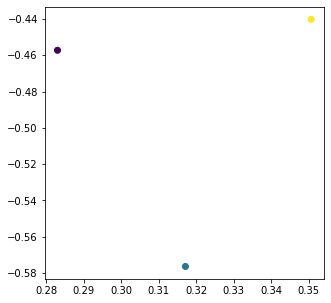

In [71]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(RHAND_X[[0, 5, 17]], -RHAND_Y[[0, 5, 17]], c=RHAND_Z[[0, 5, 17]])
plt.show()

In [46]:
wrist = np.array(rhand_sample.iloc[0][['x', 'y','z']], dtype=np.float32)
rhand5 = np.array(rhand_sample.iloc[5][['x', 'y','z']], dtype=np.float32)
rhand17 = np.array(rhand_sample.iloc[17][['x', 'y','z']], dtype=np.float32)

a = rhand17 - wrist
b = rhand5 - wrist
print(a, b)

[-0.03410155 -0.11907771 -0.03832656] [ 0.03351855 -0.13610363  0.06016441]


In [54]:
np.cross(a, b)
np.linalg.norm(np.cross(a, b))
print(np.cross(a, b), np.linalg.norm(np.cross(a, b)))

[-0.01238063  0.00076705  0.00863266] 0.0151126105


In [56]:
upnv = np.cross(a, b) / np.linalg.norm(np.cross(a, b))
print(upnv, np.linalg.norm(upnv))

[-0.8192248   0.05075553  0.5712221 ] 1.0


### Face landmark index

In [25]:
sample.loc[sample.frame==20]

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
538,20,20-right_hand-16,right_hand,16,0.422241,0.390434,-0.049388
539,20,20-right_hand-17,right_hand,17,0.282980,0.457257,-0.038326
540,20,20-right_hand-18,right_hand,18,0.313736,0.412344,-0.052699
541,20,20-right_hand-19,right_hand,19,0.350728,0.399582,-0.060217


In [31]:
face_sample = sample.loc[(sample.type=='face') & (sample.frame==20)]
face_sample

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
463,20,20-face-463,face,463,0.536965,0.299310,0.000543
464,20,20-face-464,face,464,0.529594,0.301546,-0.004426
465,20,20-face-465,face,465,0.524728,0.303110,-0.011502
466,20,20-face-466,face,466,0.592437,0.293800,-0.003560


In [33]:
FACE_X, FACE_Y, FACE_Z = np.array(face_sample.x), np.array(face_sample.y), np.array(face_sample.z)

NameError: name 'FACE_X' is not defined

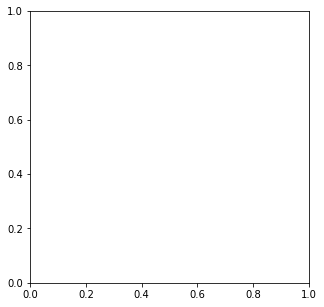

In [18]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(FACE_X[1:], -FACE_Y[1:], c=FACE_Z[1:])
plt.show()

In [36]:
FACE_LM = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]
LEYE_LM = [130, 247, 30, 29, 27, 28, 56, 190, 243, 112, 26, 22, 23, 24, 110, 25]
REYE_LM = [359, 467, 260, 259, 257, 258, 286, 414, 463, 341, 256, 252, 253, 254, 339, 255]
NOSE_LM = [6, 197, 195, 5, 4, 1, 19, 94, 2, 164, 49, 102, 64, 279, 331, 294]
LIPSOUT_LM = [0, 267, 269, 270, 409, 287, 375, 321, 405, 314, 17, 84, 181, 91, 146, 57, 185, 40, 39, 37]
LIPSIN_LM = [13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78, 191, 80, 81, 82]
SPECIAL_LM = [9, 123, 36, 50, 352, 280, 266, 199, 200]

FACE_SELECTED = []
# SELECTED.extend(FACE_LM)
# SELECTED.extend(LEYE_LM)
# SELECTED.extend(REYE_LM)
# SELECTED.extend(NOSE_LM)
FACE_SELECTED.extend(LIPSOUT_LM)
FACE_SELECTED.extend(LIPSIN_LM)
# SELECTED.extend(SPECIAL_LM)


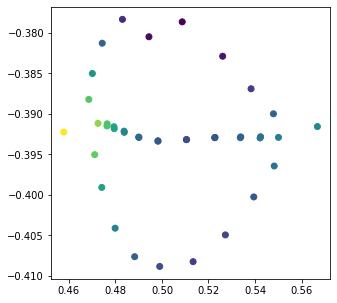

In [37]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(FACE_X[FACE_SELECTED], -FACE_Y[FACE_SELECTED], c=FACE_Z[FACE_SELECTED])
plt.show()

### Pose landmark index

In [38]:
pose_sample = sample.loc[(sample.type=='pose') & (sample.frame==20)]
pose_sample

,frame,row_id,type,landmark_index,x,y,z
489,20,20-pose-0,pose,0,0.524597,0.329134,-0.976228
490,20,20-pose-1,pose,1,0.566472,0.284107,-0.913417
491,20,20-pose-2,pose,2,0.590944,0.285315,-0.913624
492,20,20-pose-3,pose,3,0.612991,0.287311,-0.913853
493,20,20-pose-4,pose,4,0.493541,0.286207,-0.892349
494,20,20-pose-5,pose,5,0.473928,0.288163,-0.891821
495,20,20-pose-6,pose,6,0.454607,0.290489,-0.892151
496,20,20-pose-7,pose,7,0.646151,0.311624,-0.477587
497,20,20-pose-8,pose,8,0.438918,0.312438,-0.347345
498,20,20-pose-9,pose,9,0.573214,0.374347,-0.816377


In [39]:
POSE_X, POSE_Y, POSE_Z = np.array(pose_sample.x), np.array(pose_sample.y), np.array(pose_sample.z)

In [48]:
PNOSE_LM = [0]
PFACE_LM = [8, 6, 5, 4, 1,2,3,7]
BODY_LM = [11, 12, 24 ,23]
ARM_LM = [14, 16, 22, 20, 18, 13, 15, 21, 19, 17]

POSE_SELECTED = []
# POSE_SELECTED.extend(PNOSE_LM)
# POSE_SELECTED.extend(PFACE_LM)
POSE_SELECTED.extend(BODY_LM)
# POSE_SELECTED.extend(ARM_LM)

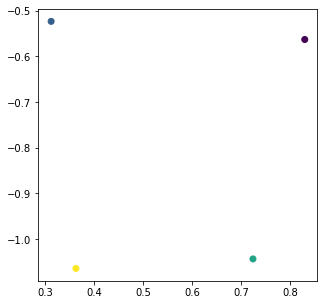

In [49]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(POSE_X[POSE_SELECTED], -POSE_Y[POSE_SELECTED], c=POSE_Z[POSE_SELECTED])
plt.show()

### Overall landmark

In [50]:
overall_sample = sample[sample.frame==20]
overall_sample

,frame,row_id,type,landmark_index,x,y,z
0,20,20-face-0,face,0,0.494400,0.380470,-0.030626
1,20,20-face-1,face,1,0.496017,0.350735,-0.057565
2,20,20-face-2,face,2,0.500818,0.359343,-0.030283
3,20,20-face-3,face,3,0.489788,0.321780,-0.040622
4,20,20-face-4,face,4,0.495304,0.341821,-0.061152
...,...,...,...,...,...,...,...
538,20,20-right_hand-16,right_hand,16,0.422241,0.390434,-0.049388
539,20,20-right_hand-17,right_hand,17,0.282980,0.457257,-0.038326
540,20,20-right_hand-18,right_hand,18,0.313736,0.412344,-0.052699
541,20,20-right_hand-19,right_hand,19,0.350728,0.399582,-0.060217


In [51]:
X, Y, Z = overall_sample.x, overall_sample.y, overall_sample.z

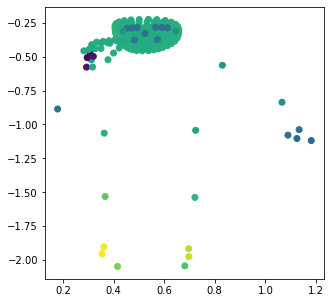

In [52]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(X[:], -Y[:], c=Z[:])
plt.show()